In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier






#reading the data from csv file 
df= pd.read_csv("titanic.csv", encoding="ISO-8859-1")



In [2]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
# Looking at first few rows of dataset
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Looking at last few rows of dataset
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# quick grab of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
#Gives the numbers of rows and columns 
df.shape

(1310, 14)

In [7]:
#showcase specific informations about a specific column.
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
#Detect missing values.
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [9]:
#Finding the number of missing values.
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [10]:
#drop if all values are NaN
df.dropna(axis=0, how= 'all', thresh=None, inplace=True)

In [11]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
#replacing missing numerical values and converting to integer
df['age'].fillna(df['age'].mean(), inplace = True)
df['age']=df['age'].apply(np.int)

In [13]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
numbersofelements = len(df["cabin"])
print("number of elements : ", numbersofelements)
#Number of elements per category 
print(df["cabin"].value_counts())


number of elements :  1309
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
C78                4
                  ..
A5                 1
D43                1
T                  1
B38                1
C30                1
Name: cabin, Length: 186, dtype: int64


In [15]:
#replace and display the values
df["cabin"].fillna('C25', inplace = True)

In [16]:
numbersofelements = len(df["home.dest"])
print("number of elements : ", numbersofelements)
print(df["home.dest"].value_counts())

number of elements :  1309
New York, NY                     64
London                           14
Montreal, PQ                     10
Cornwall / Akron, OH              9
Paris, France                     9
                                 ..
Barre, Co Washington, VT          1
Foresvik, Norway Portland, ND     1
Hessle, Yorks                     1
Myren, Sweden New York, NY        1
New Britain, CT                   1
Name: home.dest, Length: 369, dtype: int64


In [17]:
df["home.dest"].fillna('New York, NY', inplace = True)

In [18]:
#drop column
df.drop(['boat'], axis=1, inplace=True)

In [19]:
df.drop(['body'], axis=1, inplace=True)

In [20]:
numbersofelements = len(df["embarked"])
print("number of elements : ", numbersofelements)
print(df["embarked"].value_counts())

number of elements :  1309
S    914
C    270
Q    123
Name: embarked, dtype: int64


In [21]:
df["embarked"].fillna('S', inplace = True)

In [22]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
cabin        0
embarked     0
home.dest    0
dtype: int64

In [23]:
numbersofelements = len(df["fare"])
print("number of elements : ", numbersofelements)
print(df["fare"].value_counts())

number of elements :  1309
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
13.7917     1
10.7083     1
7.7417      1
7.8208      1
34.6542     1
Name: fare, Length: 281, dtype: int64


In [24]:
df['fare'].fillna(df['fare'].mean(), inplace = True)

In [25]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  home.dest  1309 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 132.9+ KB


In [27]:
numbersofelements = len(df["survived"])
print("number of elements : ", numbersofelements)
print(df["survived"].value_counts())

number of elements :  1309
0.0    809
1.0    500
Name: survived, dtype: int64


In [28]:
df['survived']=df['survived'].apply(np.int)

In [29]:
numbersofelements = len(df["survived"])
print("number of elements : ", numbersofelements)
print(df["survived"].value_counts())

number of elements :  1309
0    809
1    500
Name: survived, dtype: int64


In [30]:
numbersofelements = len(df["pclass"])
print("number of elements : ", numbersofelements)
print(df["pclass"].value_counts())

number of elements :  1309
3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64


In [31]:
df['pclass']=df['pclass'].apply(np.int)

In [32]:
numbersofelements = len(df["sibsp"])
print("number of elements : ", numbersofelements)
print(df["sibsp"].value_counts())

number of elements :  1309
0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64


In [33]:
df['sibsp']=df['sibsp'].apply(np.int)

In [34]:
numbersofelements = len(df["parch"])
print("number of elements : ", numbersofelements)
print(df["parch"].value_counts())

number of elements :  1309
0.0    1002
1.0     170
2.0     113
3.0       8
5.0       6
4.0       6
9.0       2
6.0       2
Name: parch, dtype: int64


In [35]:
df['parch']=df['parch'].apply(np.int)

In [36]:
df
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C25,C,"Montevideo, Uruguay"


In [37]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


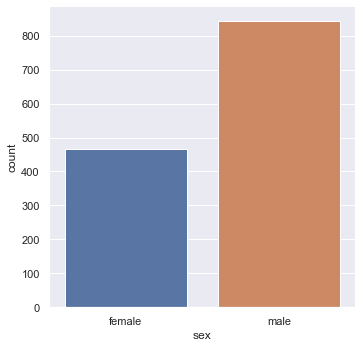

In [38]:
sns.factorplot('sex', data=df, kind="count") ## Let's check gender

In [39]:
# the number of male is higher compared to female


In [40]:
def bar_chart(feature):
    survived = df[df['survived']==1][feature].value_counts()
    dead = df[df['survived']==0][feature].value_counts()
    a = pd.DataFrame([survived, dead])
    a.index = ['survived', 'dead']
    a.plot(kind='bar', stacked=True, figsize=(10, 5))

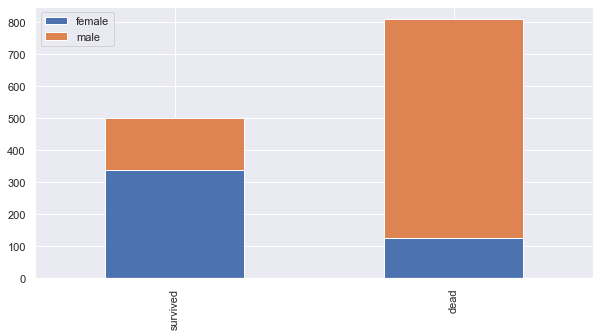

In [41]:
bar_chart('sex')

In [42]:
#the number of female living is higher compared to male.

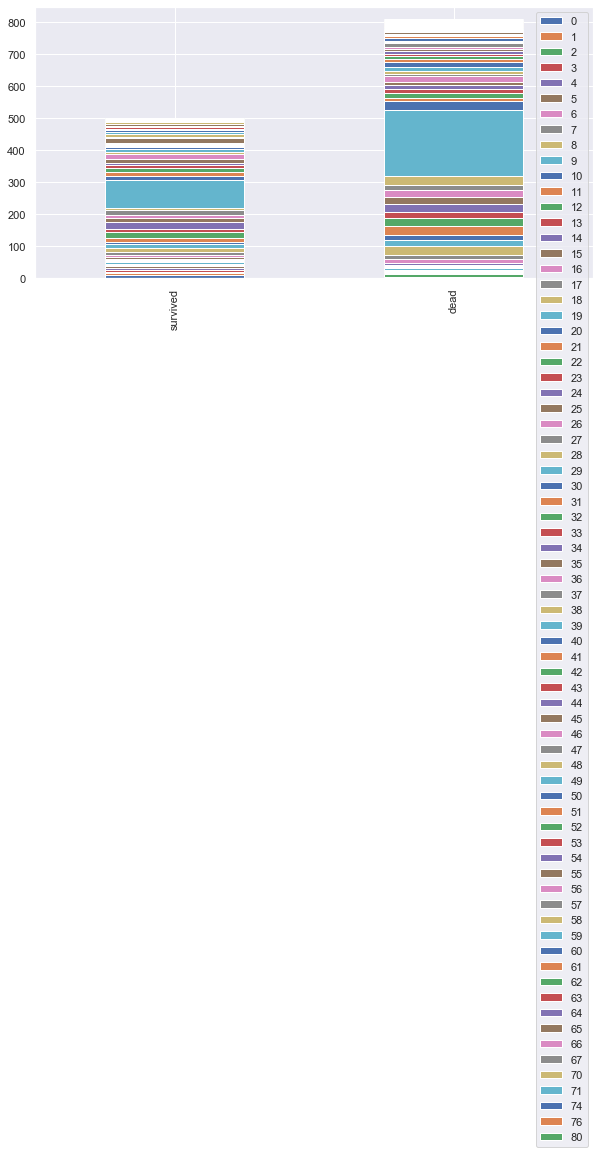

In [43]:
bar_chart('age')

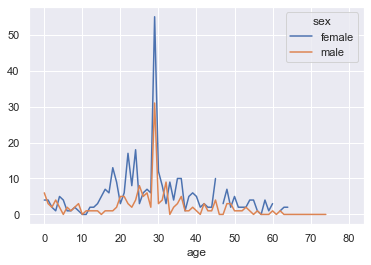

In [44]:
df.pivot_table('survived', index='age', columns='sex', aggfunc="sum").plot()

In [45]:
#the number of female living is higher compared to male and the highest living age of 30 years.

df['age'].mean() # Get the mean of Age

29.685255920550038

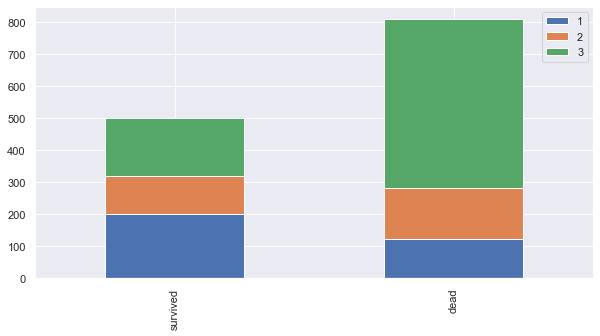

In [46]:
bar_chart('pclass')

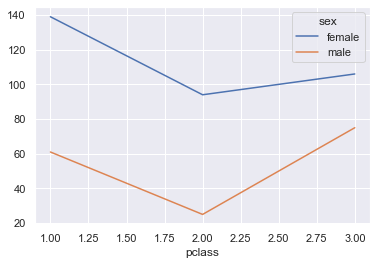

In [47]:
df.pivot_table('survived', index='pclass', columns='sex', aggfunc="sum").plot()

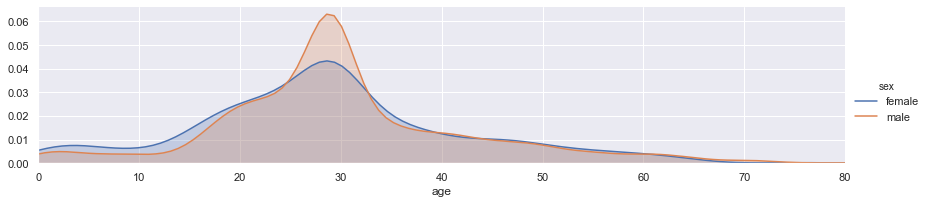

In [48]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df, hue="sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'age',shade= True)

# Set the x max limit by the oldest 
oldest = df['age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

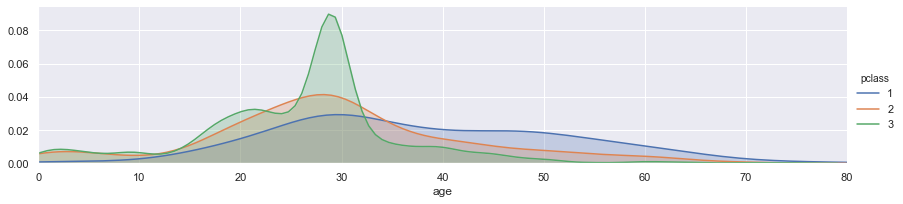

In [49]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(df, hue='pclass', aspect=4)

fig.map(sns.kdeplot, 'age',shade=True)

oldest = df['age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

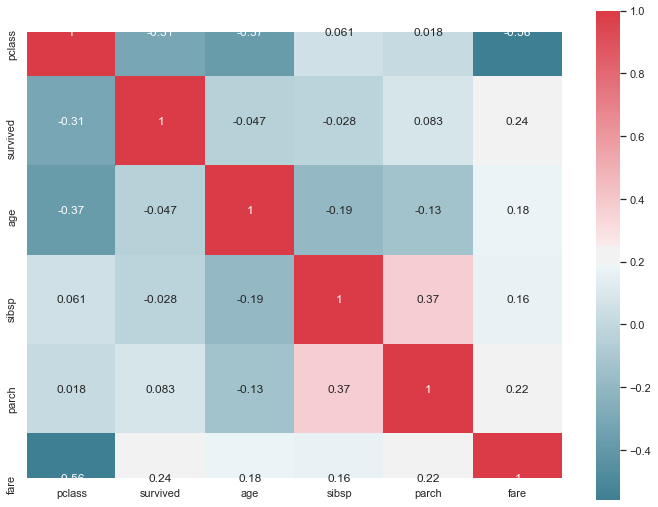

In [50]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }


    )
    
plot_correlation_map( df )

In [51]:
#the mean of survived compared to pclass
df[['survived', 'pclass']].groupby(['pclass'], as_index=True).mean() 

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


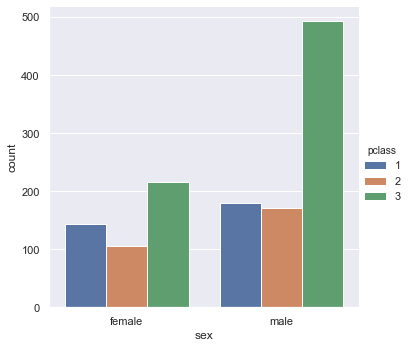

In [52]:
sns.factorplot('sex',  data=df, kind="count", hue='pclass')

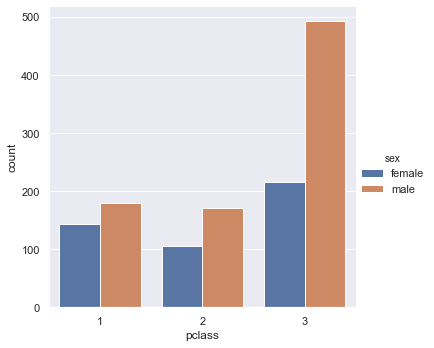

In [53]:
sns.factorplot('pclass', data=df, kind="count", hue='sex')

In [54]:
df
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

In [55]:
#the appropriate Title for each individual 
liste=[]
df1 = " "
for data in df['name']:
    df1 = data.split(",")
    df1= df1[1].split(".")
    df2= df1[0].strip()
    liste.append(df2)
    
df["Titre"]=liste
   

In [56]:
df
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


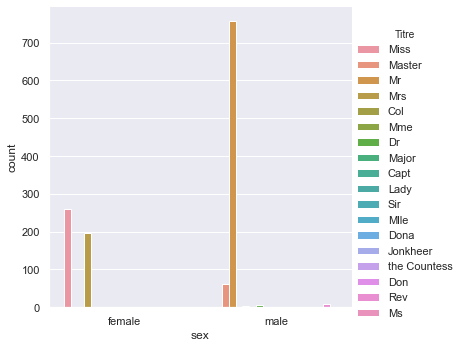

In [57]:
sns.factorplot('sex',  data=df, kind="count", hue='Titre')

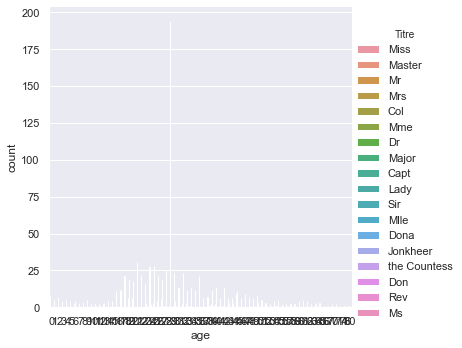

In [58]:
sns.factorplot('age',  data=df, kind="count", hue='Titre')

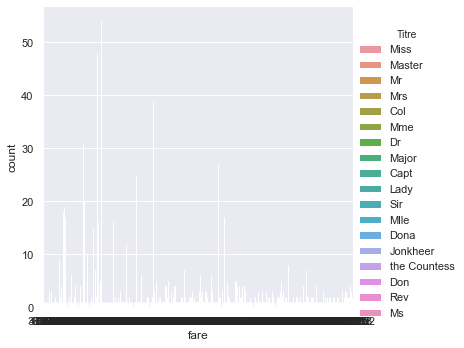

In [59]:
sns.factorplot('fare',  data=df, kind="count", hue='Titre')

In [60]:
Title_Dictionary = {
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir" :"Royalty",
    "Lady" :"Royalty",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Miss",
    "Mlle":"Miss",
    "Miss" :"Miss",
    "Ms":"Mrs",
    "Mr" :"Mrs",
    "Mrs" :"Mrs",
    "Master":"Master"

                    }

In [61]:
#group these title into more useful ones hint
df["Titre"].replace(Title_Dictionary, inplace=True)
df["Titre"].head(200)

0        Miss
1      Master
2        Miss
3         Mrs
4         Mrs
        ...  
195      Miss
196       Mrs
197       Mrs
198       Mrs
199      Miss
Name: Titre, Length: 200, dtype: object

In [62]:
#create a more useful feature, let's call it Family
df['familysize'] =  df.parch + df.sibsp

In [63]:
# Check to make sure it worked
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3


In [64]:
# Let's start by adding a new column to define family

# add the parent/child column with the sibsp column

df['family'] =  df.parch + df.sibsp
df['family']
# Look for >0 or ==0 to set family status
df['family'].loc[df['family'] != 0] = 'With Family'
df['family'].loc[df['family'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
# Check to make sure it worked
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss,0,Alone
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master,3,With Family
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss,3,With Family
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family


In [66]:
#drop column
#df.drop(['Alone'], axis=1, inplace=True)

In [67]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss,0,Alone
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master,3,With Family
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss,3,With Family
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family


In [68]:
numbersofelements = len(df["family"])
print("number of elements : ", numbersofelements)
print(df["family"].value_counts())

number of elements :  1309
Alone          790
With Family    519
Name: family, dtype: int64


In [69]:
#the number of travelers with their family is less than alone

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


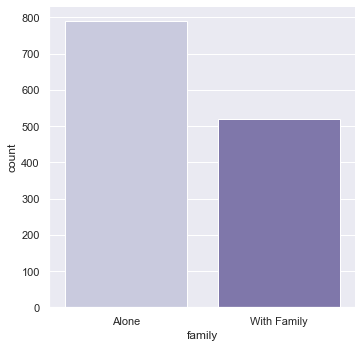

In [70]:
# Now let's get a simple visualization!

sns.factorplot('family', data=df, palette='Purples', kind='count')

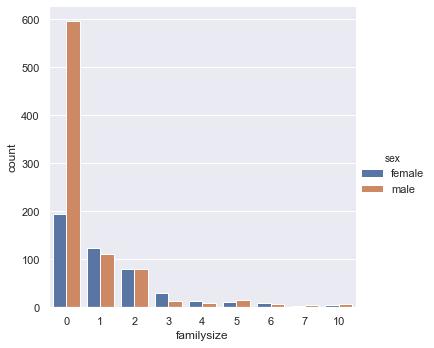

In [71]:
sns.factorplot('familysize',  data=df, kind="count", hue='sex')

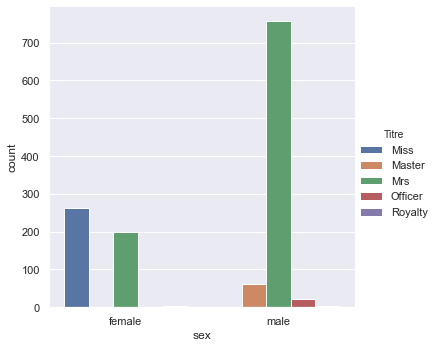

In [72]:
sns.factorplot('sex',  data=df, kind="count", hue='Titre')

In [73]:
df["Titre"].value_counts()

Mrs        956
Miss       263
Master      61
Officer     23
Royalty      6
Name: Titre, dtype: int64

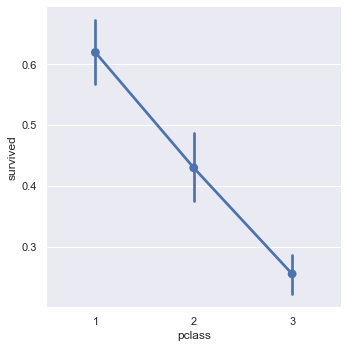

In [74]:
# use a factor plot again, but now considering class

sns.factorplot('pclass','survived',data=df)

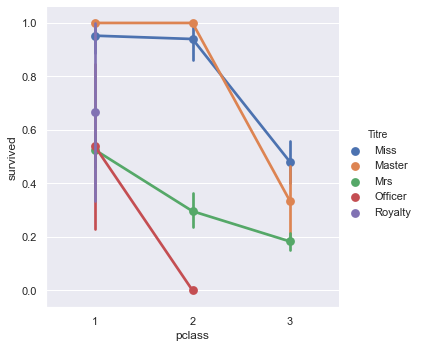

In [75]:
# Let's use a factor plot again, but now considering class and gender

sns.factorplot('pclass', 'survived', hue='Titre', data=df)

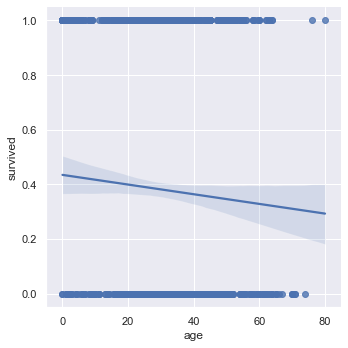

In [76]:
# Use a linear plot on age versus survival

sns.lmplot('age','survived', data=df)

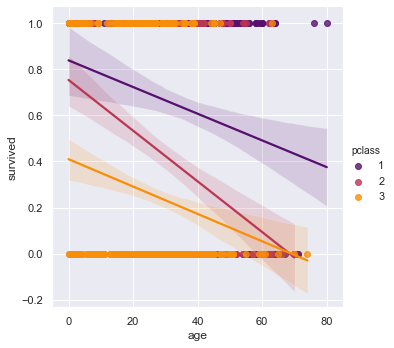

In [77]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot('age','survived',hue='pclass', data=df, palette='inferno')

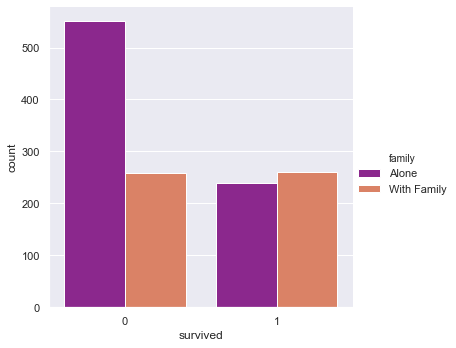

In [78]:
sns.factorplot('survived',data=df, hue='family',palette='plasma',kind='count')

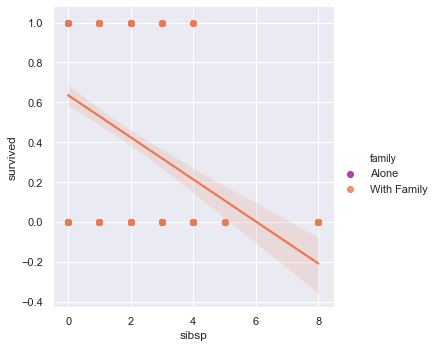

In [79]:
sns.lmplot('sibsp','survived',data=df, hue='family',palette='plasma')

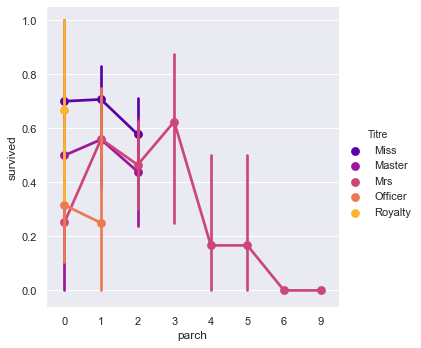

In [80]:
sns.factorplot('parch','survived',data=df, hue='Titre',palette='plasma')

In [81]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'Titre', 'familysize',
       'family'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       1309 non-null   object 
 10  embarked    1309 non-null   object 
 11  home.dest   1309 non-null   object 
 12  Titre       1309 non-null   object 
 13  familysize  1309 non-null   int64  
 14  family      1309 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 203.6+ KB


In [83]:
df['name'].values

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['name']=encoder.fit_transform(df['name'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,female,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss,0,Alone
1,1,1,23,male,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master,3,With Family
2,1,0,24,female,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss,3,With Family
3,1,0,25,male,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
4,1,0,26,female,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,female,14,1,0,2665,14.4542,C25,C,"New York, NY",Miss,1,With Family
1305,3,0,1292,female,29,1,0,2665,14.4542,C25,C,"New York, NY",Miss,1,With Family
1306,3,0,1293,male,26,0,0,2656,7.2250,C25,C,"New York, NY",Mrs,0,Alone
1307,3,0,1294,male,27,0,0,2670,7.2250,C25,C,"New York, NY",Mrs,0,Alone


In [85]:
df['sex'].values

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [86]:
cleanup_nums={
    "sex" : {"female": 1, "male": 0}
}
df.replace(cleanup_nums, inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,24160,211.3375,B5,S,"St Louis, MO",Miss,0,Alone
1,1,1,23,0,0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Master,3,With Family
2,1,0,24,1,2,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Miss,3,With Family
3,1,0,25,0,30,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
4,1,0,26,1,25,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,2665,14.4542,C25,C,"New York, NY",Miss,1,With Family
1305,3,0,1292,1,29,1,0,2665,14.4542,C25,C,"New York, NY",Miss,1,With Family
1306,3,0,1293,0,26,0,0,2656,7.2250,C25,C,"New York, NY",Mrs,0,Alone
1307,3,0,1294,0,27,0,0,2670,7.2250,C25,C,"New York, NY",Mrs,0,Alone


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   int32  
 3   sex         1309 non-null   int64  
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       1309 non-null   object 
 10  embarked    1309 non-null   object 
 11  home.dest   1309 non-null   object 
 12  Titre       1309 non-null   object 
 13  familysize  1309 non-null   int64  
 14  family      1309 non-null   object 
dtypes: float64(1), int32(1), int64(7), object(6)
memory usage: 198.5+ KB


In [88]:
df['home.dest'].values

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON',
       'Montreal, PQ / Chesterville, ON', ..., 'New York, NY',
       'New York, NY', 'New York, NY'], dtype=object)

In [89]:
df["home.dest"].value_counts()

New York, NY                     628
London                            14
Montreal, PQ                      10
Cornwall / Akron, OH               9
Paris, France                      9
                                ... 
Barre, Co Washington, VT           1
Foresvik, Norway Portland, ND      1
Hessle, Yorks                      1
Myren, Sweden New York, NY         1
New Britain, CT                    1
Name: home.dest, Length: 369, dtype: int64

In [90]:
df['home.dest']=encoder.fit_transform(df['home.dest'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,24160,211.3375,B5,S,308,Miss,0,Alone
1,1,1,23,0,0,1,2,113781,151.5500,C22 C26,S,230,Master,3,With Family
2,1,0,24,1,2,1,2,113781,151.5500,C22 C26,S,230,Miss,3,With Family
3,1,0,25,0,30,1,2,113781,151.5500,C22 C26,S,230,Mrs,3,With Family
4,1,0,26,1,25,1,2,113781,151.5500,C22 C26,S,230,Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,2665,14.4542,C25,C,236,Miss,1,With Family
1305,3,0,1292,1,29,1,0,2665,14.4542,C25,C,236,Miss,1,With Family
1306,3,0,1293,0,26,0,0,2656,7.2250,C25,C,236,Mrs,0,Alone
1307,3,0,1294,0,27,0,0,2670,7.2250,C25,C,236,Mrs,0,Alone


In [91]:
df["home.dest"].value_counts()

236    628
196     14
229     10
78       9
257      9
      ... 
200      1
199      1
197      1
194      1
0        1
Name: home.dest, Length: 369, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   int32  
 3   sex         1309 non-null   int64  
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       1309 non-null   object 
 10  embarked    1309 non-null   object 
 11  home.dest   1309 non-null   int32  
 12  Titre       1309 non-null   object 
 13  familysize  1309 non-null   int64  
 14  family      1309 non-null   object 
dtypes: float64(1), int32(2), int64(7), object(5)
memory usage: 193.4+ KB


In [93]:
df['ticket']=encoder.fit_transform(df['ticket'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,187,211.3375,B5,S,308,Miss,0,Alone
1,1,1,23,0,0,1,2,49,151.5500,C22 C26,S,230,Master,3,With Family
2,1,0,24,1,2,1,2,49,151.5500,C22 C26,S,230,Miss,3,With Family
3,1,0,25,0,30,1,2,49,151.5500,C22 C26,S,230,Mrs,3,With Family
4,1,0,26,1,25,1,2,49,151.5500,C22 C26,S,230,Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,259,14.4542,C25,C,236,Miss,1,With Family
1305,3,0,1292,1,29,1,0,259,14.4542,C25,C,236,Miss,1,With Family
1306,3,0,1293,0,26,0,0,250,7.2250,C25,C,236,Mrs,0,Alone
1307,3,0,1294,0,27,0,0,264,7.2250,C25,C,236,Mrs,0,Alone


In [94]:
df['cabin']=encoder.fit_transform(df['cabin'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,187,211.3375,43,S,308,Miss,0,Alone
1,1,1,23,0,0,1,2,49,151.5500,79,S,230,Master,3,With Family
2,1,0,24,1,2,1,2,49,151.5500,79,S,230,Miss,3,With Family
3,1,0,25,0,30,1,2,49,151.5500,79,S,230,Mrs,3,With Family
4,1,0,26,1,25,1,2,49,151.5500,79,S,230,Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,259,14.4542,81,C,236,Miss,1,With Family
1305,3,0,1292,1,29,1,0,259,14.4542,81,C,236,Miss,1,With Family
1306,3,0,1293,0,26,0,0,250,7.2250,81,C,236,Mrs,0,Alone
1307,3,0,1294,0,27,0,0,264,7.2250,81,C,236,Mrs,0,Alone


In [95]:
df['embarked']=encoder.fit_transform(df['embarked'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,187,211.3375,43,2,308,Miss,0,Alone
1,1,1,23,0,0,1,2,49,151.5500,79,2,230,Master,3,With Family
2,1,0,24,1,2,1,2,49,151.5500,79,2,230,Miss,3,With Family
3,1,0,25,0,30,1,2,49,151.5500,79,2,230,Mrs,3,With Family
4,1,0,26,1,25,1,2,49,151.5500,79,2,230,Mrs,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,259,14.4542,81,0,236,Miss,1,With Family
1305,3,0,1292,1,29,1,0,259,14.4542,81,0,236,Miss,1,With Family
1306,3,0,1293,0,26,0,0,250,7.2250,81,0,236,Mrs,0,Alone
1307,3,0,1294,0,27,0,0,264,7.2250,81,0,236,Mrs,0,Alone


In [96]:
df['Titre'].values

array(['Miss', 'Master', 'Miss', ..., 'Mrs', 'Mrs', 'Mrs'], dtype=object)

In [97]:
df['Titre']=encoder.fit_transform(df['Titre'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,187,211.3375,43,2,308,1,0,Alone
1,1,1,23,0,0,1,2,49,151.5500,79,2,230,0,3,With Family
2,1,0,24,1,2,1,2,49,151.5500,79,2,230,1,3,With Family
3,1,0,25,0,30,1,2,49,151.5500,79,2,230,2,3,With Family
4,1,0,26,1,25,1,2,49,151.5500,79,2,230,2,3,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,259,14.4542,81,0,236,1,1,With Family
1305,3,0,1292,1,29,1,0,259,14.4542,81,0,236,1,1,With Family
1306,3,0,1293,0,26,0,0,250,7.2250,81,0,236,2,0,Alone
1307,3,0,1294,0,27,0,0,264,7.2250,81,0,236,2,0,Alone


In [98]:
cleanup_nums={
    "family" : {"Alone": 1, "With Family": 0}
}
df.replace(cleanup_nums, inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,Titre,familysize,family
0,1,1,21,1,29,0,0,187,211.3375,43,2,308,1,0,1
1,1,1,23,0,0,1,2,49,151.5500,79,2,230,0,3,0
2,1,0,24,1,2,1,2,49,151.5500,79,2,230,1,3,0
3,1,0,25,0,30,1,2,49,151.5500,79,2,230,2,3,0
4,1,0,26,1,25,1,2,49,151.5500,79,2,230,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,259,14.4542,81,0,236,1,1,0
1305,3,0,1292,1,29,1,0,259,14.4542,81,0,236,1,1,0
1306,3,0,1293,0,26,0,0,250,7.2250,81,0,236,2,0,1
1307,3,0,1294,0,27,0,0,264,7.2250,81,0,236,2,0,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   int32  
 3   sex         1309 non-null   int64  
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   int32  
 8   fare        1309 non-null   float64
 9   cabin       1309 non-null   int32  
 10  embarked    1309 non-null   int32  
 11  home.dest   1309 non-null   int32  
 12  Titre       1309 non-null   int32  
 13  familysize  1309 non-null   int64  
 14  family      1309 non-null   int64  
dtypes: float64(1), int32(6), int64(8)
memory usage: 172.9 KB


In [100]:
#LogisticRegression

#features extraction
#x=df[["age", "home.dest", 0, 1, "name"]]
x=df[["pclass", "name", "sex", "age", "sibsp", "parch", "ticket",
       "fare", "cabin", "embarked", "home.dest", "Titre", "familysize",
       "family"]]
y=df["survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


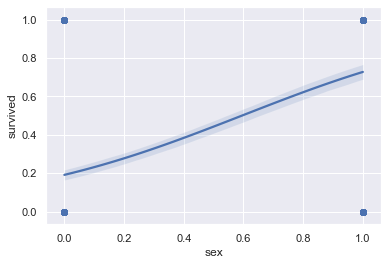

In [101]:
sns.regplot(x='sex',y='survived',data=df,logistic=True)

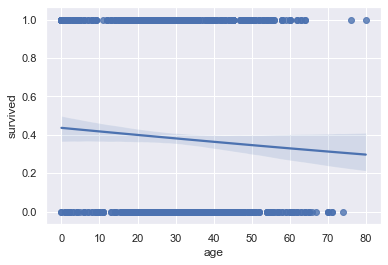

In [102]:
sns.regplot(x='age',y='survived',data=df,logistic=True)

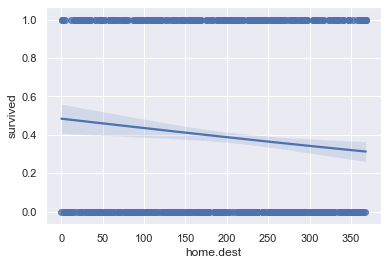

In [103]:
sns.regplot(x='home.dest' ,y='survived',data=df,logistic=True)

In [104]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['age'], colnames=['survived'])
print(confusion_matrix)

survived    0   1
age              
0         216  31
1          53  93


In [105]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['sex'], colnames=['survived'])
print(confusion_matrix)

survived    0   1
sex              
0         216  31
1          53  93


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       247
           1       0.75      0.64      0.69       146

    accuracy                           0.79       393
   macro avg       0.78      0.76      0.76       393
weighted avg       0.78      0.79      0.78       393



In [107]:
# generate two class dataset
x, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=30)

# split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [108]:
# logistic regression
model1 = LogisticRegression()

# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [109]:

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [110]:

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9729644906743186 0.9540889526542324


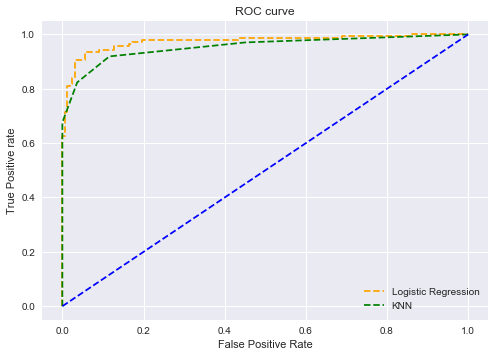

In [111]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

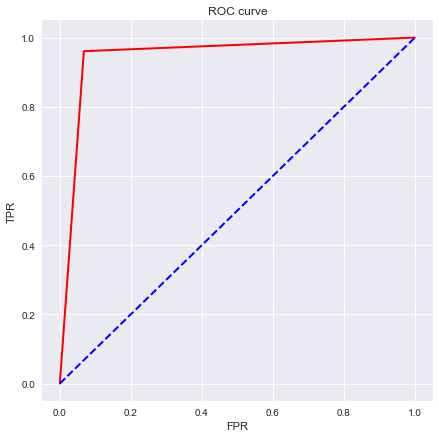

In [112]:
#roc_curve
model1.fit(x_train, y_train)
fpr, tpr,_=roc_curve(model1.predict(x),y,drop_intermediate=False)

#Matplotlip graph roc_curve

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [113]:
#applying Decision tree algorithm
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
#print("score:{}".format(accuracy_score(x_test, y_test)))
tree.score(x_test, y_test)

0.9533333333333334

In [135]:
#features extraction
x=df[["pclass", "name", "sex", "age", "sibsp", "parch",
       "fare", "cabin", "embarked", "home.dest", "Titre", "familysize",
       "family"]]
y=df["survived"]

#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 30%

#applying Decision tree algorithm
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
#print("score:{}".format(accuracy_score(x_test, y_test)))
tree.score(x_test, y_test)

0.7748091603053435

In [134]:
#features extraction
x=df[["name", "sex", "age", "sibsp", "parch", "ticket",
       "embarked", "home.dest", "Titre", "familysize",
       ]]
y=df["survived"]

#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 30%

#applying Decision tree algorithm
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
tree.score(x_test, y_test)

0.7608142493638677

In [167]:
#def plot_decision_tree(df,x,y):
#    from IPython.display import Image 
#    from io import StringIO
#    import pydotplus
#    dot_data = StringIO()  
#    tree.export_graphviz(df, out_file=dot_data,  
#                         feature_names=x,  
#                         class_names=y,  
#                         filled=True, rounded=True,  
#                         special_characters=True)  
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#    return Image(graph.create_png())

#plot_decision_tree(df,x,y)

In [166]:
#import graphviz
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

#dot_data = StringIO()
#export_graphviz(df, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = x,class_names=y)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('test.png')
#Image(graph.create_png())

In [175]:
#import relevant libraries
from sklearn.ensemble import RandomForestClassifier


#features extraction
x=df[["pclass", "name", "sex", "age", "sibsp", "parch", "ticket",
       "fare", "cabin", "embarked", "home.dest", "Titre", "familysize",
       "family"]]
y=df["survived"]

#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 30%


In [176]:
# Random Forests  algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)    #fitting training data
y_pred = random_forest.predict(x_test)  #testing model’s performance
random_forest.score(x_test, y_test)

0.811704834605598

In [184]:
# Random Forests  algorithm
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train, y_train)    #fitting training data
y_pred = random_forest.predict(x_test)  #testing model’s performance
random_forest.score(x_test, y_test)

0.816793893129771

In [183]:
# Random Forests  algorithm
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(x_train, y_train)    #fitting training data
y_pred = random_forest.predict(x_test)  #testing model’s performance
random_forest.score(x_test, y_test)

0.8193384223918575

In [191]:
# Random Forests  algorithm
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)    #fitting training data
y_pred = random_forest.predict(x_test)  #testing model’s performance
random_forest.score(x_test, y_test)

0.8295165394402035

In [192]:
#know the best estimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}

In [193]:
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [196]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.7s finished


{'n_estimators': 1000}

In [228]:
#clf = tree.DecisionTreeClassifier(random_state = 241)
#clf = clf.fit(x, y)
#tree.plot_tree(clf)
#plt.show()

In [ ]:
# #know the best estimator : 1000